<a href="https://colab.research.google.com/github/Savycode10/Body-mass-calculator/blob/main/Rainfall_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd


In [ ]:
# Load Lagos map
lagos_map = gpd.read_file("ng.json")

# Filter only Lagos state
lagos_map = lagos_map[lagos_map['name'] == 'Lagos']

# Load rainfall data
df = pd.read_excel("Annual mean rainfall data.xlsx")
df.columns = df.columns.str.strip()

In [ ]:
# Extract data
years = df["Year"]
rainfall = df["Annual Mean Rainfall"]


In [ ]:
# Normalize rainfall for size scaling
sizes = (rainfall - min(rainfall) + 1) * 100
colors = plt.cm.Blues((rainfall - min(rainfall)) / (max(rainfall) - min(rainfall)))


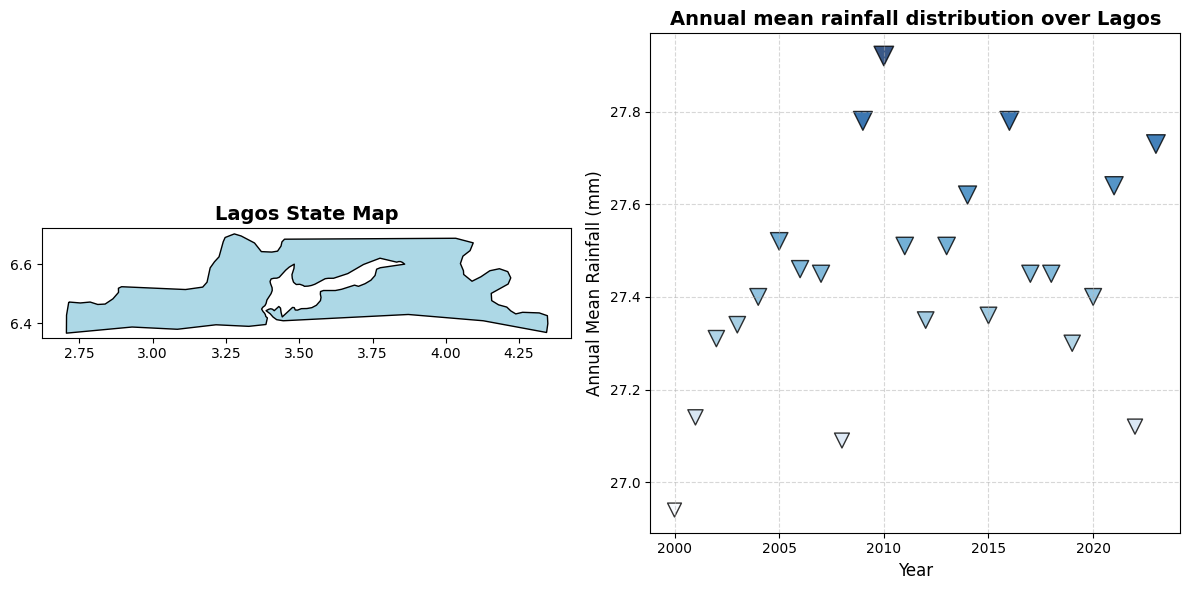

In [ ]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# **Plot 1: Lagos Map**
lagos_map.plot(ax=axes[0], color="lightblue", edgecolor="black")
axes[0].set_title("Lagos State Map", fontsize=14, fontweight='bold')

# **Plot 2: Rainfall Scatter Plot**
axes[1].scatter(years, rainfall, s=sizes, color=colors, edgecolors='black', marker='v', alpha=0.8)
axes[1].set_title("Annual mean rainfall distribution over Lagos", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Annual Mean Rainfall (mm)", fontsize=12)
axes[1].grid(True, linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


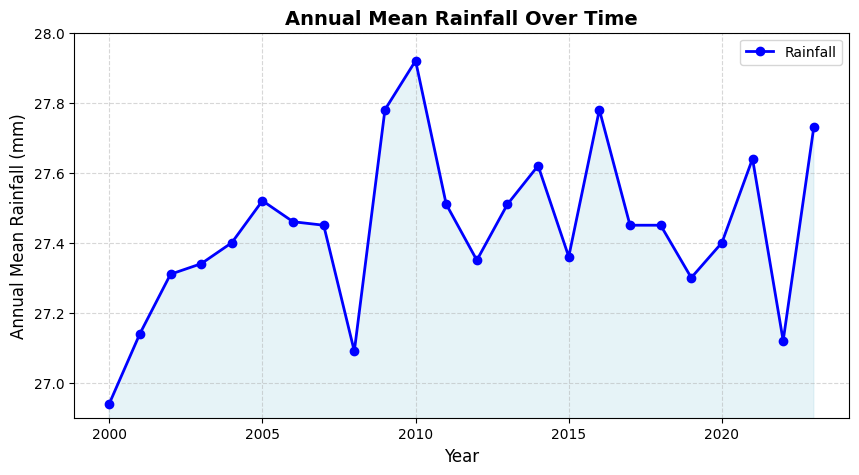

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot time series with line and markers
ax.plot(years, rainfall, color='blue', linestyle='-', linewidth=2, marker='o', markersize=6, label='Rainfall')

# Fill area under the curve to emphasize variations
ax.fill_between(years, rainfall, color='lightblue', alpha=0.3)

# Labels and title
ax.set_title("Annual Mean Rainfall Over Time", fontsize=14, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Annual Mean Rainfall (mm)", fontsize=12)
ax.set_ylim(26.9, 28)

# Grid for better readability
ax.grid(True, linestyle="--", alpha=0.5)

# Show legend
ax.legend()

# Display the plot
plt.show()

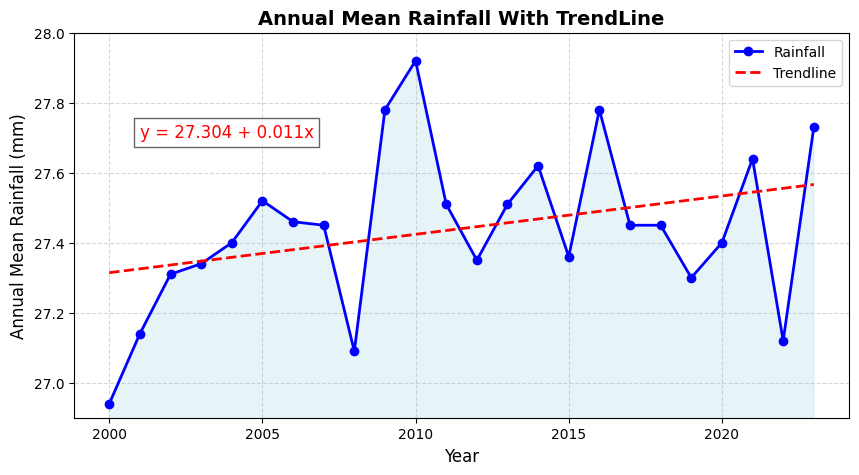

In [ ]:

# Fit a linear regression model: y = mx + c
years_adjusted = years - min(years) + 1  # Converts years to 1, 2, 3, ..., 24
m, c = np.polyfit(years_adjusted, rainfall, 1) # First-degree polynomial (linear trend)

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot actual data
ax.plot(years, rainfall, color='blue', linestyle='-', linewidth=2, marker='o', markersize=6, label='Rainfall')

# Plot trendline
ax.plot(years, m * years_adjusted + c, color='red', linestyle='--', linewidth=2, label='Trendline')

# Fill area under curve
ax.fill_between(years, rainfall, color='lightblue', alpha=0.3)

# Labels and title
ax.set_title("Annual Mean Rainfall With TrendLine", fontsize=14, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Annual Mean Rainfall (mm)", fontsize=12)
ax.set_ylim(26.9, 28)

# Grid for better readability
ax.grid(True, linestyle="--", alpha=0.5)


# Display trendline equation on plot
equation_text = f"y = {c:.3f} + {m:.3f}x"
ax.text(years.min() + 1, 27.7, equation_text, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.6))

# Grid and legend
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

# Show plot
plt.show()


In [ ]:
years_adjusted = years - min(years) + 1  # Converts years to 1, 2, 3, ..., 24
m1, c1 = np.polyfit(years_adjusted, rainfall, 1)

equation = f"y = {c:.3f} + {m:.3f}x"
print(equation)

y = 27.304 + 0.011x


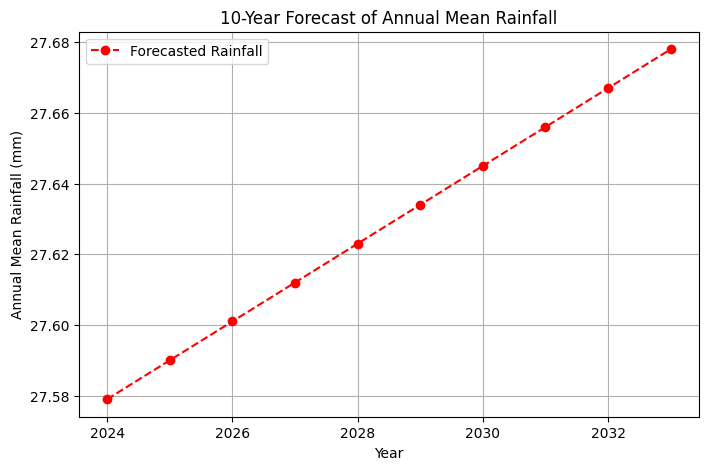

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given trendline equation: y = 27.304 + 0.011x
intercept = 27.304
slope = 0.011

# Generate future years (assuming last year in dataset is 2024)
future_years = np.arange(2024, 2034)
data_point = np.arange(25,35)
future_rainfall = intercept + slope * data_point # Forecasted values

# Plot
plt.figure(figsize=(8, 5))
plt.plot(future_years, future_rainfall, 'r--o', label='Forecasted Rainfall')
plt.xlabel('Year')
plt.ylabel('Annual Mean Rainfall (mm)')
plt.title('10-Year Forecast of Annual Mean Rainfall')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate future years
future_years = np.arange(2024, 2034)
data_point = np.arange(25,35)
# Compute forecasted rainfall values
forecasted_rainfall = c + m * data_point
# Create a DataFrame for better presentation
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Rainfall (mm)': forecasted_rainfall})

# Display the forecast table
print(forecast_df)

   Year  Forecasted Rainfall (mm)
0  2024                 27.577319
1  2025                 27.588271
2  2026                 27.599223
3  2027                 27.610175
4  2028                 27.621128
5  2029                 27.632080
6  2030                 27.643032
7  2031                 27.653984
8  2032                 27.664936
9  2033                 27.675888


In [ ]:

years_adjusted = years - min(years) + 1
m, c = np.polyfit(years_adjusted, rainfall, 1)

# Calculate predicted rainfall values using the linear model
predicted_rainfall = m * years_adjusted + c

# Calculate the Mean Squared Error (MSE)
mse = np.mean((rainfall - predicted_rainfall)**2)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.04692305012077295
